1. Import the necessary libraries for time series and also libraries for data operations and charting


In [207]:
import numpy as np
from pmdarima import model_selection
import pmdarima as pm
import pandas as pd
from pandas import DataFrame
import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline


2. Read the data from the analysis.csv file. The following methods are helpful in interpreting the data: head(), describe(), len(), shape.


In [208]:
import pandas 
df =pandas.read_csv("analiza.csv", sep = ",", decimal = ",")
df.head(7)



,Data,Rezerwacja
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


In [209]:

len(df)


144

In [210]:
df.describe()

,Rezerwacja
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [211]:
df.shape

(144, 2)

3. Make a preliminary graph of the data obtained


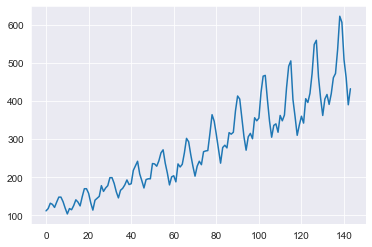

In [212]:
rez=df[['Rezerwacja']]
rez.head()
plt.plot(rez)

4. Calculate ADF

In [213]:
#ADF extended Dickey-Fuller test to check stationarity

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

df_ = read_csv('analiza.csv', header=0, index_col=0)
result = adfuller(df_.values)
print('Test Static: %f' % result[0])
print('p value: %f' % result[1])

if result [1] < 0.05:
    print("Ciąg jest stacjonarny")
else:
    print("Ciąg nie jest stacjonarny")

Test Static: 0.815369
p value: 0.991880
Ciąg nie jest stacjonarny


5. Make an ACF chart


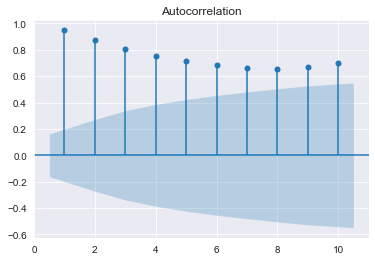

In [214]:
#ACF autocorrelation function graph

plot_acf(df_,zero=False, lags=10)
plt.show()


6. Make a PACF chart


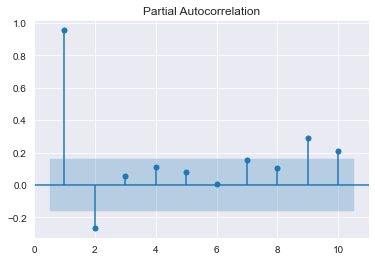

In [215]:
#PACF - plot of the partial autocorrelation function
plot_pacf(df_,zero=False, lags=10)
plt.show()

7. Divide the series into the training and test data of the recognition hikes and calculate the AIC criterion for the ARIMA (3,0,1) model (results.summary())

In [216]:
#ARIMA

X = df_[['Rezerwacja']].values
train = X[0:106] # dane treningowe
test = X[106:]  #dane testowe
predictions = [train, test]
model = ARIMA(train, order=(3,0,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  106
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -483.726
Date:                Fri, 16 Dec 2022   AIC                            979.452
Time:                        12:39:15   BIC                            995.432
Sample:                             0   HQIC                           985.929
                                - 106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.2032     41.783      5.486      0.000     147.311     311.096
ar.L1          0.4709      0.122      3.866      0.000       0.232       0.710
ar.L2          0.5572      0.150      3.710      0.0

8. Use the AUTO-ARIMA function to select the best model for the forecast.

In [217]:
#AUTO-ARIMA
auto_arima=pm.auto_arima(train, exogenous=None, seasonal=True, m=4, d=1, D=1,   #pm.auto.arima
                     max_p=10, max_q=3, trace=True, error_action='ignore',
                     suppress_warning=True)
print(auto_arima.summary())



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1037.234, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1002.634, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=1031.146, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=778.989, Time=0.54 sec
 ARIMA(1,1,0)(2,1,2)[4]             : AIC=780.336, Time=0.86 sec
 ARIMA(1,1,0)(1,1,2)[4]             : AIC=901.768, Time=0.79 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=781.705, Time=0.19 sec
 ARIMA(2,1,0)(2,1,1)[4]             : AIC=780.735, Time=0.67 sec
 ARIMA(1,1,1)(2,1,1)[4]             : AIC=779.187, Time=0.48 sec
 ARIMA(0,1,1)(2,1,1)[4]             : AIC=779.206, Time=0.44 sec

9. Make a forecast chartkres prognozy

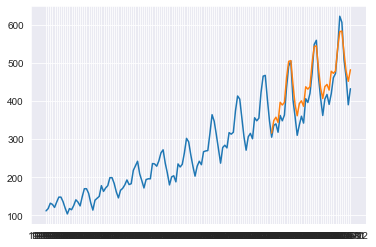

In [220]:
pred = auto_arima.predict(n_periods = len(test))
test_d = df['Data'][106:]


plt.figure()
plt.plot(df['Data'], df['Rezerwacja'])
plt.plot(test_d, pred)
plt.show()

## Conclusions

ADF- the data in the "analysis.csv" file is non-stationary, which means that in order to be able to apply the methods of analyzing temporal data and selecting the appropriate methods of analysis, we would have to transform it into stationary data through appropriate transformations (e.g., by deemphasizing the mean or the appropriate power of the time series)

From the ACF graph, we can read that the data are weakly correlated, while they are outside the error line, so we can consider the data statistically significant.

From the PACF chart, we can see that there is a lot of data with a PACF value close to 0, which indicates a weak correlation.

The AIC value was about 778, which means that the model is particularly good and there are better models that describe the data better.

From the forecast chart, you can see that our data more or less matches 